# 클러스터링

## 1) 개요

In [ ]:
# 유클리드거리 - 직선거리 - 주요 사용됨
# 맨해튼거리  - 더하기만해도돼서 연산 비용이 적음, 정확도 떨어짐

# 군집화 방법
# 계측적 군집화 방법
# 비계층적 군집화 방법

In [ ]:
# C. K-means 군집화의 실행단계

# 1) 나누고자 하는 클러스터의 개수를 설정, 그 갯수만큼 임의의 초기점 생성
# 2) initial point를 군집중심점으로 생각하고 군집 구분 실시
# 3) 군집별로 새로운 군집중심점을 계산
# 4) 새로운 군집중심점을 기준으로 군집 구분 실시
# 5) 3-4번 과정을 반복 (더 이상 군집 구분의 변화가 없을 때까지)

# ① 다음과 같이 X, Y로 분포되어 있는 데이터들을 유사한 3개의 집단으로 군집화
# ② 우선 임의로 3개의 군집 중심점(임시)을 설정
# ③ 임시로 설정된 세 좌표를 기준으로 군집화 수행
# ④ 각 군집별 중심점을 계산하여, 새로운 중심점 설정
# ⑤ 새로운 중심점을 기준으로 군집화 수행  일부 좌표의 소속 군집 변화
# ⑥ 다시 새로운 군집 중심점 설정 (이후 앞의 내용을 계속해서 반복)


In [ ]:
# D. K-means clustering 방법의 장/단점

# 1) 장점
# 적용이 쉽고 간단하다

# 2) 단점
# 군집의 개수 K는 사전에 설정하여야 한다
# 군집 설정에 Outlier(극단좌표)의 영향이 크게 작용한다

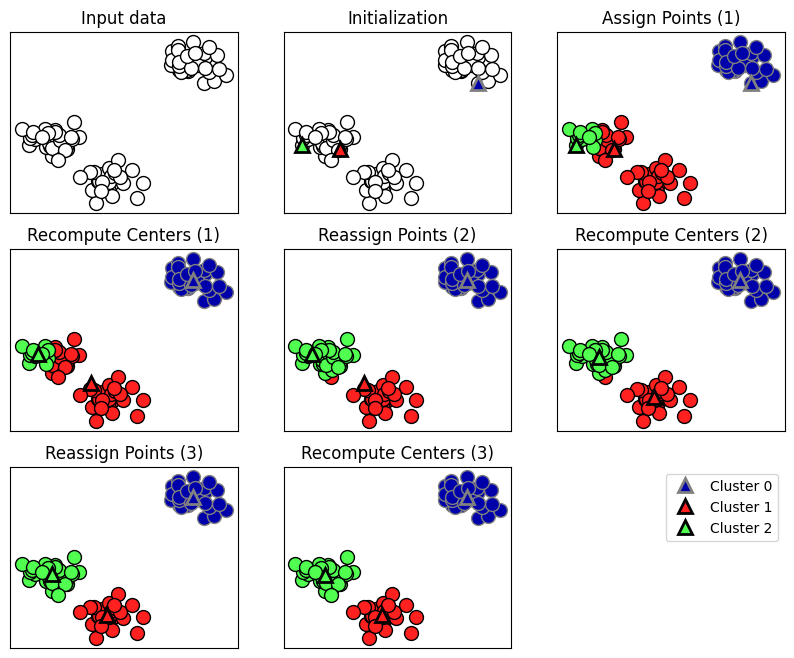

In [1]:
# kmeans 알고리즘에 대한 설명
import mglearn
mglearn.plots.plot_kmeans_algorithm()

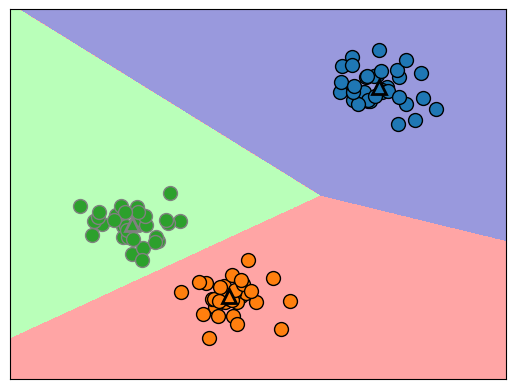

In [2]:
# kmeans 경계 표시
import matplotlib.pyplot as plt
mglearn.plots.plot_kmeans_boundaries()
plt.show()

In [3]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

#2개의 클러스터로 구분
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

#모형이 분류한 라벨
print(kmeans.labels_)

#새로운 값에 대한 분류
X_new=np.array([[0, 0], [12, 3]])
print(kmeans.predict(X_new))

#중심좌표
print(kmeans.cluster_centers_)

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]


c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


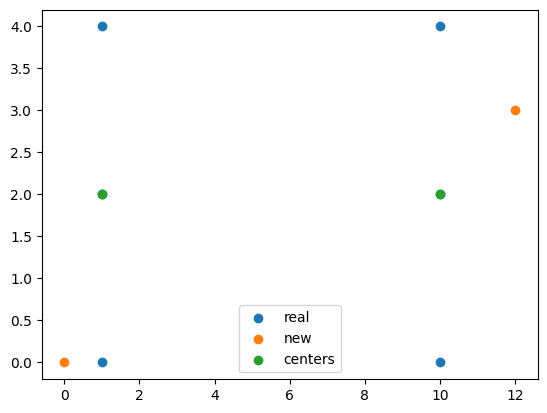

In [4]:
plt.scatter(X[:,0],X[:,1],label='real')
plt.scatter(X_new[:,0], X_new[:,1] ,label='new')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='centers')
plt.legend()
plt.show()

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적인 2차원 데이터셋
X, y = make_blobs(random_state=1)

# 군집 모형 생성
model = KMeans(n_clusters=3)
model.fit(X)

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [6]:
# 모형이 분류한 값
lbl=model.labels_
lbl

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

In [7]:
#예측한 값
pred = model.predict(X)
print(pred)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [8]:
# 모델의 정확도
# 클러스터링에는 정확도 계산이 의미가 없음
import sklearn.metrics as sm
sm.accuracy_score(y, pred)

# 실루엣스코어 : 클러스터링 평가 기준

0.0

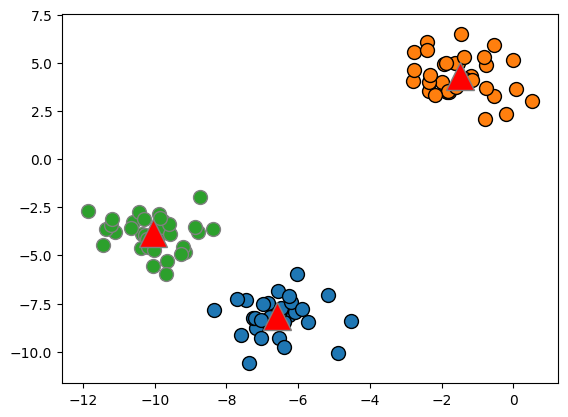

In [9]:
#3개의 클러스터를 산점도로 표현
mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, markers='o')

#centers
mglearn.discrete_scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', c='r', s=20)

plt.show()

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

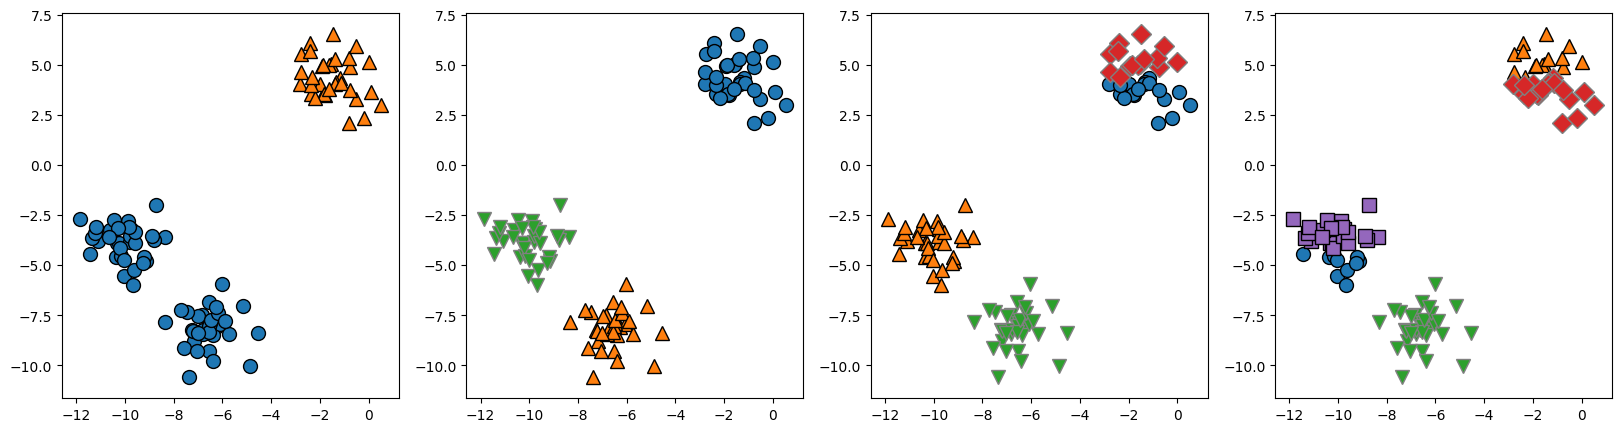

In [10]:
from matplotlib import pyplot as plt

#같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
#1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2,3,4,5개의 클러스터로 나눌 경우
idx=0

for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], lbls, ax=axes[idx])
    idx+=1

plt.show()

## 2) 오존량 예측

In [1]:
import pandas as pd

# csv 파일을 로딩
df = pd.read_csv("./data/ozone/ozone2.csv")
df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,21,8.0,9.7,59,1,0
1,5,23,25.0,9.7,61,4,0
2,5,18,78.0,18.4,57,6,0
3,7,15,48.0,14.3,80,7,0
4,9,24,49.0,10.3,69,7,0


In [2]:
cols=['Solar.R', 'Wind', 'Temp']

X = df[cols]
y = df['Result']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=10)

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

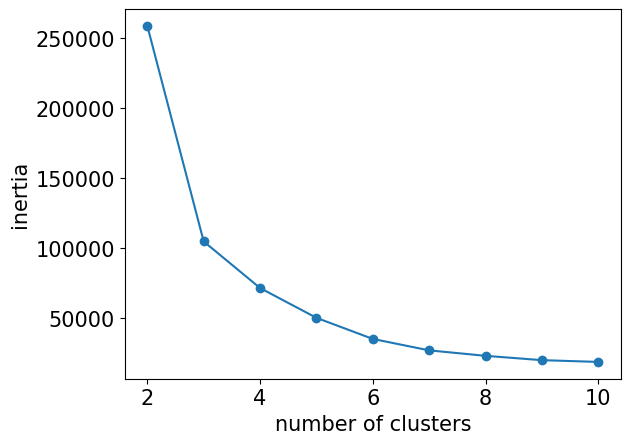

In [3]:
#최적의 클러스터 갯수를 구하는 방법
#inertia value : 군집화가 된 후 각 중심점에서 군집의 데이터간의 거리를 합산한 값
#작을수록 응집도가 높은 군집

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

clusters = range(2, 11)
inertias = []

for n in clusters:
    # 모델 생성
    model = KMeans(n_clusters=n,random_state=10)
    model.fit(X_train)
    inertias.append(model.inertia_) 

plt.rcParams["font.size"]=15
plt.plot(clusters, inertias, "-o")
plt.ylabel("inertia")
plt.xlabel("number of clusters")
plt.show()

#엘보우(elbow) 기법
#inertias 값이 하강하다가 팔꿈치처럼 꺾이는 부분 3
#따라서 3개의 클러스터로 분류하는 것이 적절함

In [4]:
# 클러스터수 3개
model = KMeans(n_clusters=3,random_state=10)
print(model)

pred=model.fit_predict(X_train)
print(pred[:5])

pred=model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=3, random_state=10)
[2 0 1 0 2]
[1 1 2 1 0]


c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
# 군집화에서는 개별 라벨값보다는 군집이 중요함
# 실루엣 값은 한 클러스터 안의 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한가를 나타냄
# ai : i와 같은 군집에 속한 원소들의 평균 거리
# bi : i와 다른 군집 중 가장 가까운 군집까지의 평균 거리
# (bi - ai) / max(ai,bi)
# 실루엣계수가 클수록 좋은 모형
# 군집의 형상이 복잡하거나 크기의 차이가 많이 나면 비교가 어려운 단점이 있음
# 숫자가 1.0에 가까울수록 군집화가 잘 되었다고 볼 수 있음

from sklearn.metrics import silhouette_score
silhouette_score(X_test, pred)

0.362807087165505

In [6]:
#클러스터 갯수를 2로 설정
model = KMeans(n_clusters=2,random_state=10)
print(model)

pred=model.fit_predict(X_train)
print(pred[:5])

pred=model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=2, random_state=10)
[1 0 1 0 0]
[1 1 1 1 0]


c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
silhouette_score(X_test, pred)

0.6828285281281741

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

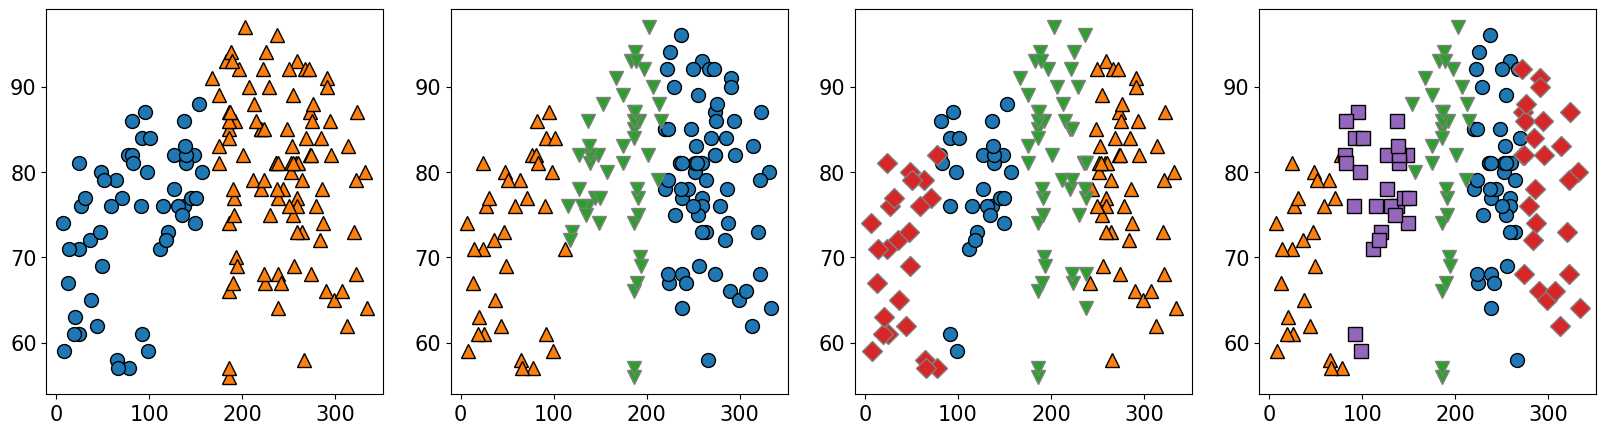

In [8]:
from matplotlib import pyplot as plt
import mglearn

#같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
#1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2,3,4,5개의 클러스터로 나눌 경우
idx=0

for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X["Solar.R"], X["Temp"], lbls, ax=axes[idx])
    idx+=1

In [9]:
# KMeans 단점
# 도넛모양 두개 안과 밖인경우 안과 밖이아닌 위아래로 나뉨
# ^v 가 겹쳐있는 경우도 ^ v 가아닌 왼쪽 오른쪽으로만 나뉨

## 3) 붓꽃 품종 분류

In [10]:
from sklearn import datasets
iris = datasets.load_iris()

In [11]:
import pandas as pd

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

df=pd.concat([X,y],axis=1)
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


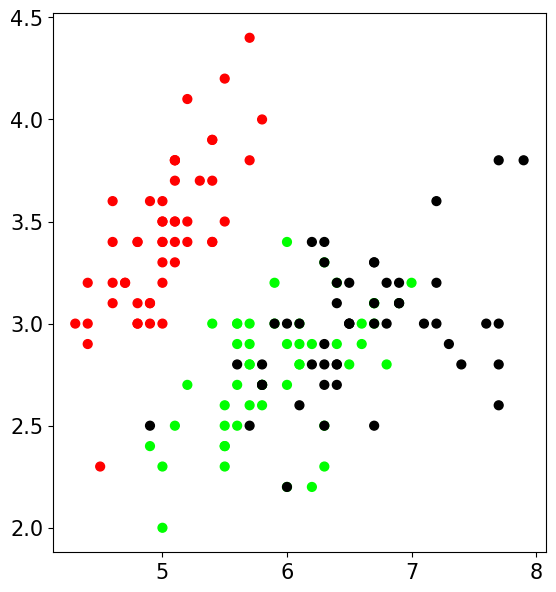

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 그래프 사이즈
plt.figure(figsize=(14,7))

# 색상 배열
colormap = np.array(['red', 'lime', 'black'])

# 꽃받침 기준 그래프
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length, X.Sepal_Width, c=colormap[y.Targets], s=40)

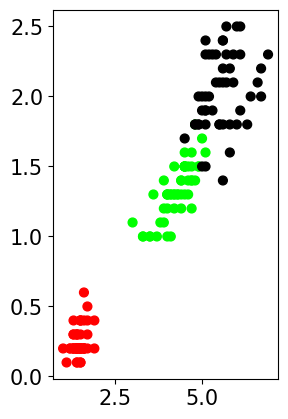

In [13]:
# 꽃잎 기준 그래프
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)

In [14]:
# KMeans Cluster 모델 생성(클러스터 3개)
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3,random_state=0)
model.fit(X)

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [15]:
# clustering 결과
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

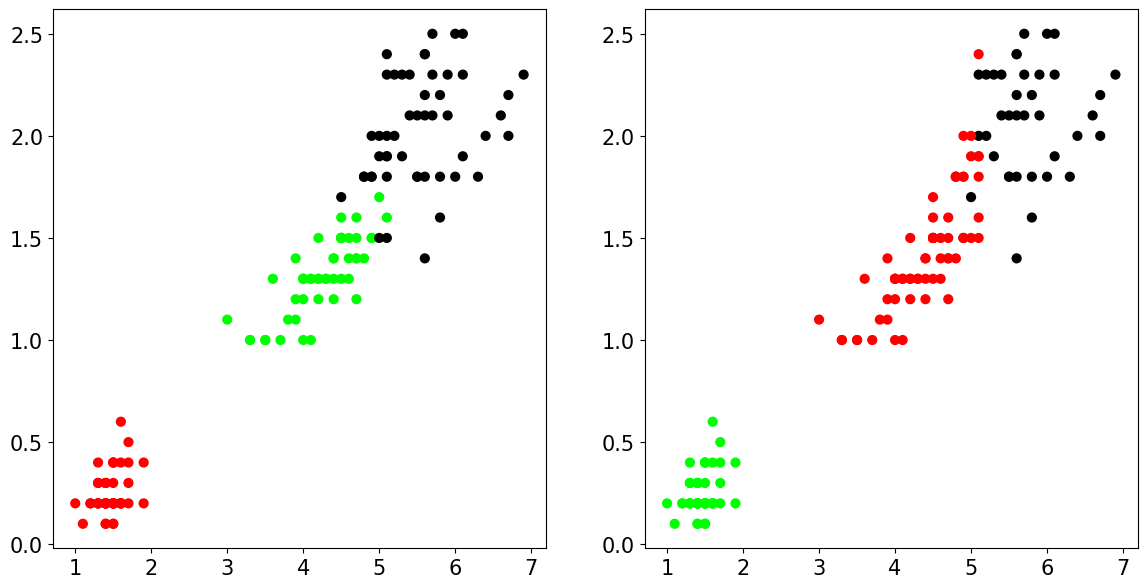

In [16]:
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))

# 색상 배열
colormap = np.array(['red', 'lime', 'black'])

# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)

# 그래프 출력(클러스터링)
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)

# clustering은 비교적 잘 되었으나 색상이 다름(label이 다르게 매겨짐)
# kmeans 알고리즘은 정답을 미리 알려주지 않는 비지도학습
# 그룹이 잘 나누어지므로 라벨 번호는 중요하지 않음

In [17]:
# label 순번 변경
# [0,1,2]에서 [1,0,2]로 변경 ( 0과 1을 서로 바꿈 )
pred = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

print(model.labels_)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


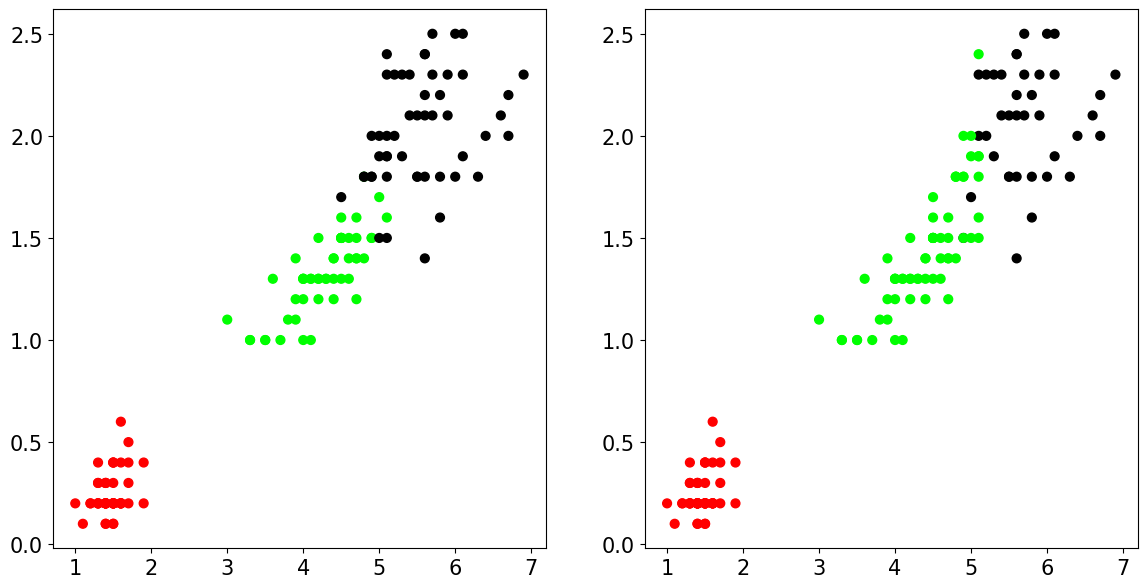

In [18]:
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))

# 색상 배열
colormap = np.array(['red', 'lime', 'black'])

# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)

# 그래프 출력(예측)
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[pred], s=40)

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

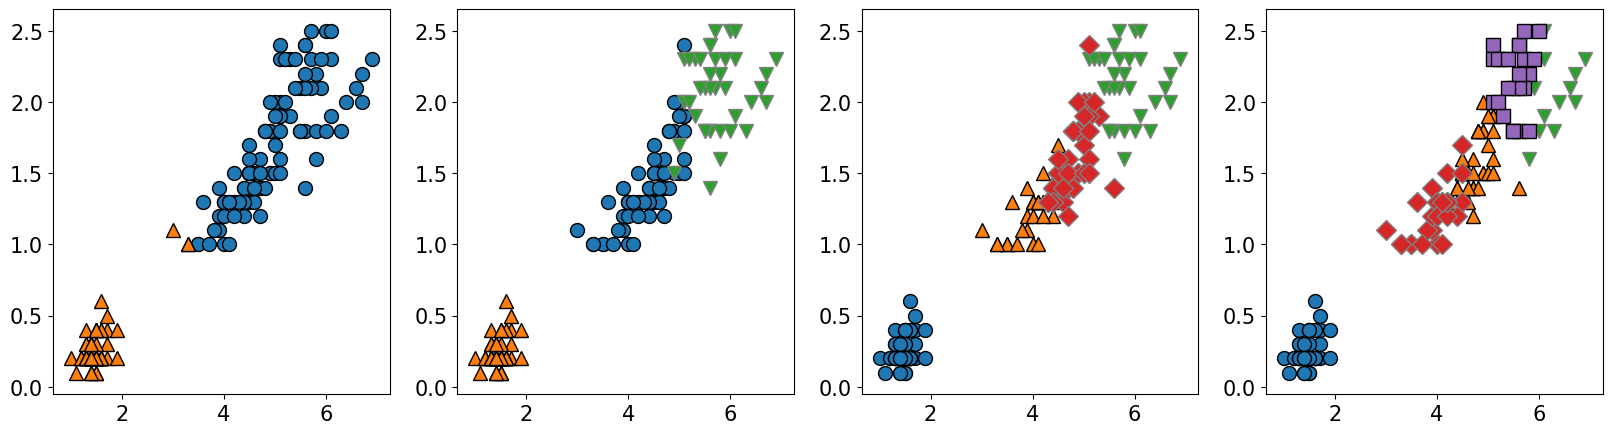

In [19]:
from matplotlib import pyplot as plt
import mglearn

#같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
#1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2,3,4,5개의 클러스터로 나눌 경우
idx=0

for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X["Petal_Length"], X["Petal_Width"], lbls, ax=axes[idx])
    idx+=1

## 4) k-means++

In [ ]:
# kmeans
# k 평균 군집화
# 중심좌표 선택

In [13]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape) # 샘플수 1797, 변수 64개 (8x8 픽셀)
print('-'*50)
print(digits.data[0].shape)
print('-'*50) 
digits.data[0]

# 0~255 정규화
# 픽셀값/255. => 0.0`1.0`

(1797, 64)
--------------------------------------------------
(64,)
--------------------------------------------------


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

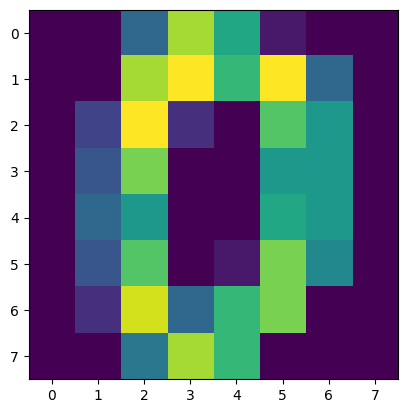

In [5]:
import matplotlib.pyplot as plt
plt.imshow(digits.data[0].reshape(8,8))

In [25]:
from sklearn.cluster import KMeans

# 비슷한 위치의 좌표들이 초기 중심좌표로 설정될 경우 불안정한 군집화 학습이 진행됨
# 최적의 초기 중심좌표들을 설정하려는 연구들이 많이 진행되었음
# 처음 1개의 좌표를 랜덤으로 선택
# 이후의 중심좌표는 이전에 선택한 중심좌표와의 거리를 계산하여 되도록 멀리 떨어진 좌표를 중심좌표로 선택
# k-means++ 기본값, random 랜덤으로 선택
# init='random' 극단적인 값으로 나올 확률이 있음

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
                # 초기좌표            군집수
# model = KMeans(init="random", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

print(model.cluster_centers_) #중심좌표

[[ 0.00000000e+00  2.24719101e-02  4.25280899e+00  1.31629213e+01
   1.12471910e+01  2.92134831e+00  3.37078652e-02  1.11022302e-16
   2.60208521e-18  8.87640449e-01  1.26629213e+01  1.33595506e+01
   1.13820225e+01  1.13483146e+01  9.66292135e-01 -6.93889390e-17
   1.30104261e-18  3.74719101e+00  1.42078652e+01  5.19662921e+00
   2.09550562e+00  1.20955056e+01  3.53370787e+00  3.46944695e-17
   6.50521303e-19  5.31460674e+00  1.26348315e+01  2.01685393e+00
   2.30337079e-01  9.06179775e+00  6.46629213e+00  1.30104261e-18
   0.00000000e+00  5.88202247e+00  1.14831461e+01  8.70786517e-01
   2.80898876e-02  8.78089888e+00  7.15730337e+00  0.00000000e+00
   5.20417043e-18  3.52808989e+00  1.33033708e+01  1.58988764e+00
   1.41573034e+00  1.13258427e+01  5.85955056e+00  1.73472348e-17
   5.20417043e-18  8.08988764e-01  1.31685393e+01  9.92696629e+00
   1.03202247e+01  1.32921348e+01  2.48314607e+00  2.24719101e-02
   3.25260652e-19  5.61797753e-03  4.21910112e+00  1.36123596e+01
   1.33426

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
import matplotlib.pyplot as plt

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2)) # 가로 8인치 세로 2인치
    i = 0

    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1

def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)

In [27]:
digits['images'].shape

(1797, 8, 8)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12704\2608591306.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


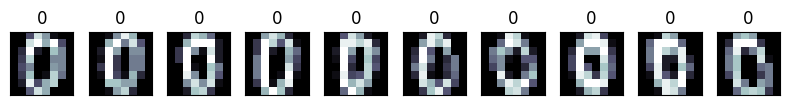

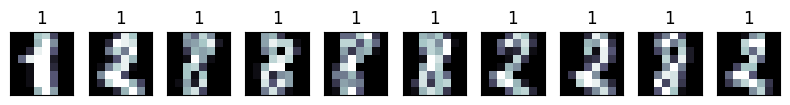

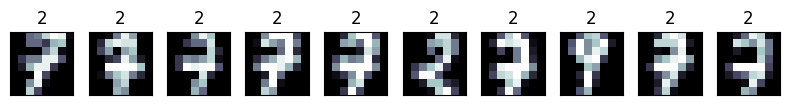

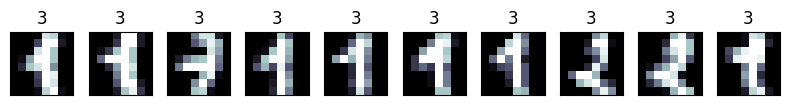

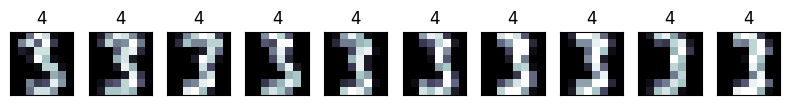

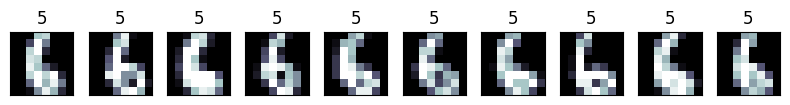

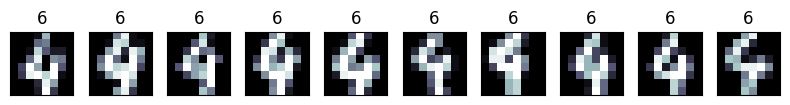

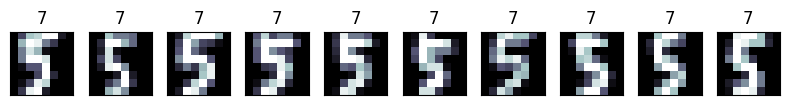

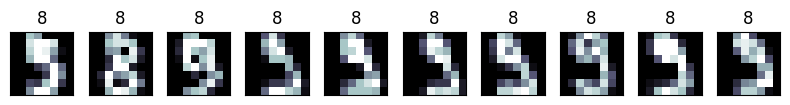

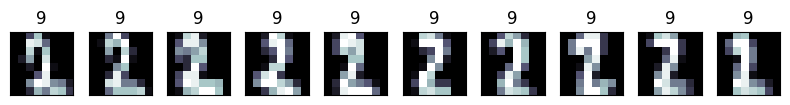

In [28]:
for i in range(10):
    show_cluster(digits.images, y_pred, i)

#이미지 위의 숫자는 군집 번호이므로 실제 번호와 일치하지 않음    

In [29]:
# 군집화에서는 혼동행렬은 의미가 없음
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[176,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0, 100,   0,  54,   1,   2,   0,   1,   0,  24],
       [  1,   8,   3,   2,  13,   0,   0,   0,   2, 148],
       [  0,   7,   7,   0, 154,   0,   0,   2,  13,   0],
       [  0,   2,  11,   3,   0,   0, 165,   0,   0,   0],
       [  0,   0,   0,   0,   2,   1,   2, 136,  41,   0],
       [  1,   3,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   2, 174,   2,   0,   0,   0,   1,   0,   0],
       [  0, 100,   5,   6,   2,   2,   0,   4,  52,   3],
       [  0,   1,   8,  20,   6,   0,   0,   6, 139,   0]], dtype=int64)

In [30]:
# 군집분석은 실루엣 스코어로 평가 (1.0 이면 좋은 점수)
from sklearn.metrics.cluster import silhouette_score

silhouette_score(digits.data, y_pred)
# k-means++ : 0.18253573914791615
# random : 0.18189172660646816


0.18253573914791615

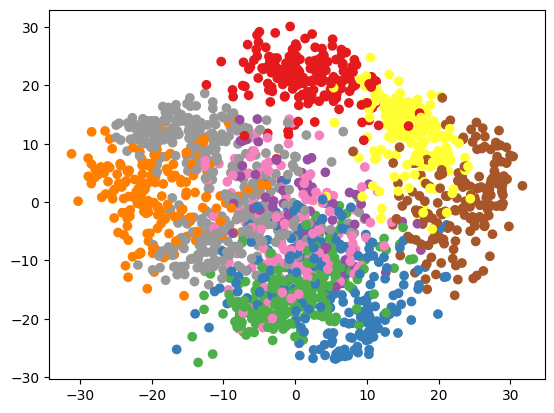

In [31]:
#군집화 결과를 주성분 분석을 통해 그린 그래프
# 64차원이기 떄문에 그림을 그릴 수 없음 / 그림을 그리기위해 2차원, 3차원으로 차원축소(주성분분석)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

## 5) MiniBatch

In [32]:
# batch : 전체 데이터를 한꺼번에 학습시키는 방법 / 일괄 - 메모리가 많이 듬
# mini batch : 전체 데이터를 mini batch 단위로 나누어서 학습시키는 방법
# online / 샘플 1개씩

# KMeans - 전체 배치
# MiniBatchKMeans - 미니배치

In [33]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150000, cluster_std=[1.0, 2.5, 0.5], random_state=170)
#                   샘플수              표준편차

In [34]:
from sklearn.cluster import KMeans

#기본모형
model1 = KMeans(n_clusters=3).fit(X)
#                클러스터수      데이터

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
#미니배치를 적용한 모형
#데이터를 미니배치 크기만큼 무작위로 분리하여 처리

from sklearn.cluster import MiniBatchKMeans
model2 = MiniBatchKMeans(n_clusters=3, batch_size=1536).fit(X)
#                                       미니배치 사이즈

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [36]:
from sklearn.metrics.cluster import silhouette_score  
silhouette_score(X[:10000], model1.predict(X[:10000]))

0.6486951691908992

In [37]:
from sklearn.metrics.cluster import silhouette_score  
silhouette_score(X[:10000], model2.predict(X[:10000]))

0.6487027719776115

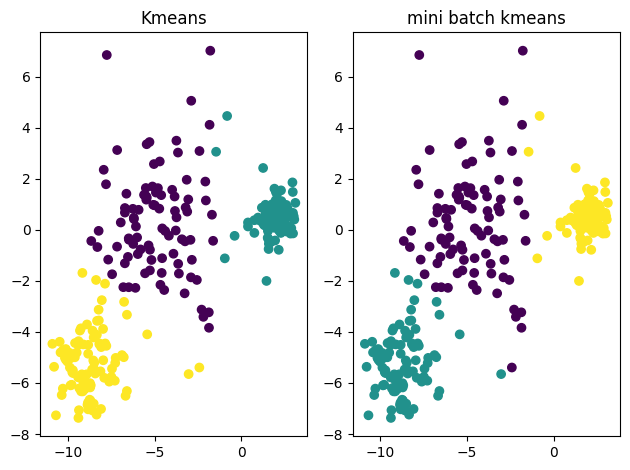

In [38]:
import matplotlib.pyplot as plt
import numpy as np

idx = np.random.randint(150000, size=300)
plt.subplot(121)
plt.scatter(X[idx, 0], X[idx, 1], c=model1.labels_[idx])
plt.title("Kmeans")
plt.subplot(122)
plt.scatter(X[idx, 0], X[idx, 1], c=model2.labels_[idx])
plt.title("mini batch kmeans")
plt.tight_layout()
plt.show()

#결과는 큰 차이가 없음

## 6) MiniBatch(iris)

In [40]:
import pandas as pd

df = pd.read_csv('./data/iris/iris.csv')
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [41]:
cols=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

X=df[cols]  
y=df['Species']

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [43]:
from sklearn.cluster import MiniBatchKMeans

#batch_size 기본값 100개
model = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=50)
model.fit(X_std)

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


MiniBatchKMeans(batch_size=50, n_clusters=3, random_state=0)

In [44]:
# clustering 결과
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, 'clustering')

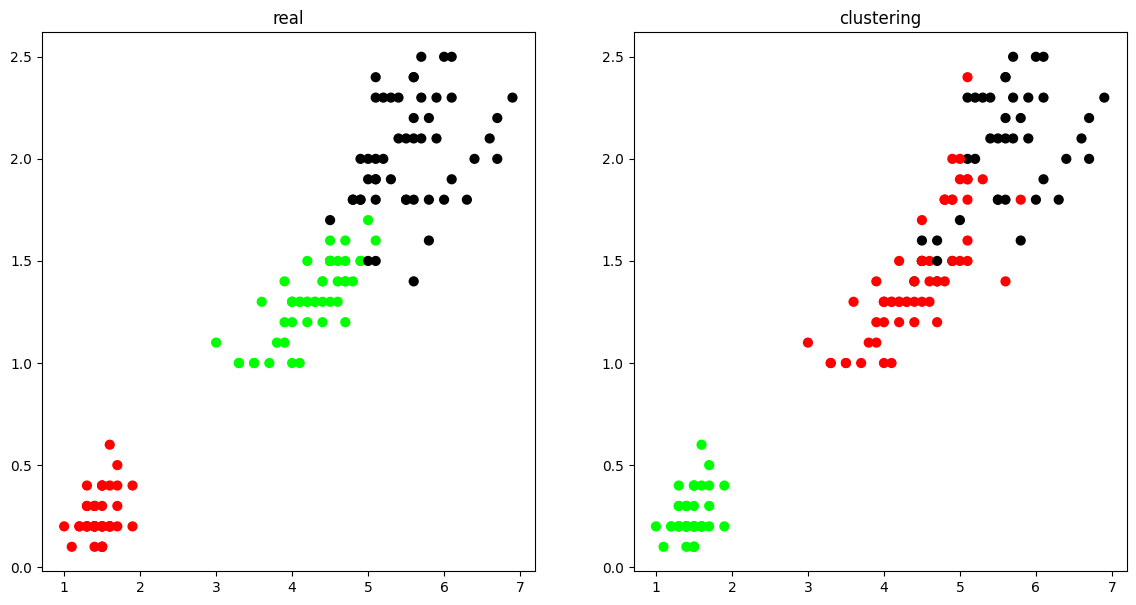

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 사이즈 설정
plt.figure(figsize=(14,7))

# 색상 배열
colormap = np.array(['red', 'lime', 'black'])

# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(X['PetalLength'], X['PetalWidth'], c=colormap[y], s=40)
plt.title('real')

# 그래프 출력(클러스터링)
plt.subplot(1, 2, 2)
plt.scatter(X['PetalLength'], X['PetalWidth'], c=colormap[model.labels_], s=40)
plt.title('clustering')

# clustering은 비교적 잘 되었으나 색상이 다름(label이 다르게 매겨짐)
# kmeans 알고리즘은 정답을 미리 알려주지 않는 비지도학습
# 그룹이 잘 나누어지므로 라벨 번호는 중요하지 않음

Text(0.5, 1.0, 'clustering')

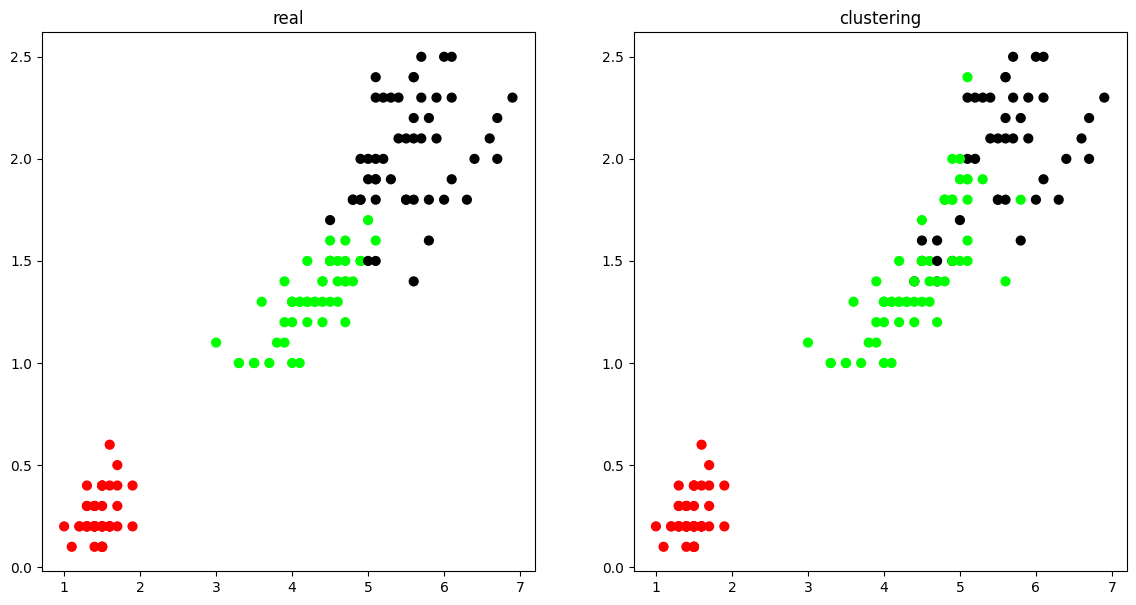

In [57]:
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))

# 색상 배열
colors1 = np.array(['red', 'lime', 'black'])
colors2 = np.array(['lime', 'red', 'black'])

# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(X['PetalLength'], X['PetalWidth'], c=colors1[y], s=40)
plt.title('real')

# 그래프 출력(예측)
plt.subplot(1, 2, 2)
plt.scatter(X['PetalLength'], X['PetalWidth'], c=colors2[model.labels_], s=40)
plt.title('clustering')

## 7) MiniBatch(face)

In [47]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image

# 샘플 이미지 로딩
one_image = load_sample_image("china.jpg")

#이미지의 차원
print(one_image.shape)

# (427, 640, 3)
# 가로 세로  채널 (흑백-1, 컬러-3)

(427, 640, 3)


([], [])

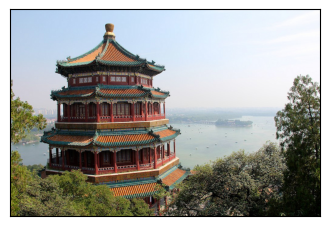

In [69]:
# 전체 이미지
plt.figure(figsize=(4, 4))
plt.imshow(one_image, cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

In [49]:
#부분 이미지 리스트
# (100,150) patch size

patches = image.extract_patches_2d(one_image, (100, 150))
print(patches.shape)

(161048, 100, 150, 3)


([], [])

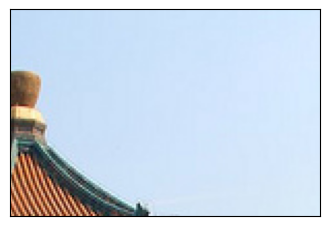

In [50]:
#부분 이미지
plt.figure(figsize=(4, 4))
plt.imshow(patches[200], cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

In [51]:
import time
import numpy as np
from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\tjoeun\scikit_learn_data


In [52]:
faces.data.shape

(400, 4096)

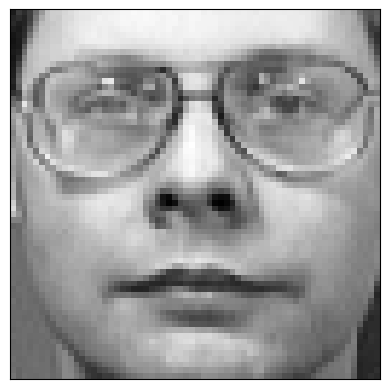

In [71]:
plt.imshow(faces.data[30].reshape(64,64), cmap=plt.cm.gray)  
plt.xticks(())  
plt.yticks(())  
plt.show()

In [54]:
# 미니배치 사이즈 기본값 1024
kmeans = MiniBatchKMeans(n_clusters=81, random_state=0, verbose=True)

#부분 이미지의 사이즈 (가로세로)
patch_size = (20, 20)
buffer = []
t0 = time.time() # 실행시간을 측정하기 위해 사용

# 400장의 이미지를 6회 반복 : 2400
index = 0
for _ in range(6): # 전체 데이터를 6회 반복
    for img in faces.images: # 400장의 이미지
        data = extract_patches_2d(img, patch_size, max_patches=50,random_state=0) # 부분이미지 추출
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        
        if index % 10 == 0:
            #버퍼에 누적
            data = np.concatenate(buffer, axis=0)
            data -= np.mean(data, axis=0) #정규화
            data /= np.std(data, axis=0) #정규화
            kmeans.partial_fit(data) # 부분학습으로 계속 학습 누적
            buffer = []

        if index % 100 == 0:
            print('부분 학습 : %4i / %i' % (index, 6 * len(faces.images)))

dt = time.time() - t0
print('실행시간:', dt)

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


[MiniBatchKMeans] Reassigning 3 cluster centers.
[MiniBatchKMeans] Reassigning 6 cluster centers.
부분 학습 :  100 / 2400
부분 학습 :  200 / 2400
[MiniBatchKMeans] Reassigning 2 cluster centers.
[MiniBatchKMeans] Reassigning 1 cluster centers.
부분 학습 :  300 / 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
부분 학습 :  400 / 2400
부분 학습 :  500 / 2400
부분 학습 :  600 / 2400
부분 학습 :  700 / 2400
부분 학습 :  800 / 2400
부분 학습 :  900 / 2400
부분 학습 : 1000 / 2400
부분 학습 : 1100 / 2400
부분 학습 : 1200 / 2400
부분 학습 : 1300 / 2400
부분 학습 : 1400 / 2400
부분 학습 : 1500 / 2400
부분 학습 : 1600 / 2400
부분 학습 : 1700 / 2400
부분 학습 : 1800 / 2400
부분 학습 : 1900 / 2400
부분 학습 : 2000 / 2400
부분 학습 : 2100 / 2400
부분 학습 : 2200 / 2400
부분 학습 : 2300 / 2400
부분 학습 : 2400 / 2400
실행시간: 2.655482530593872


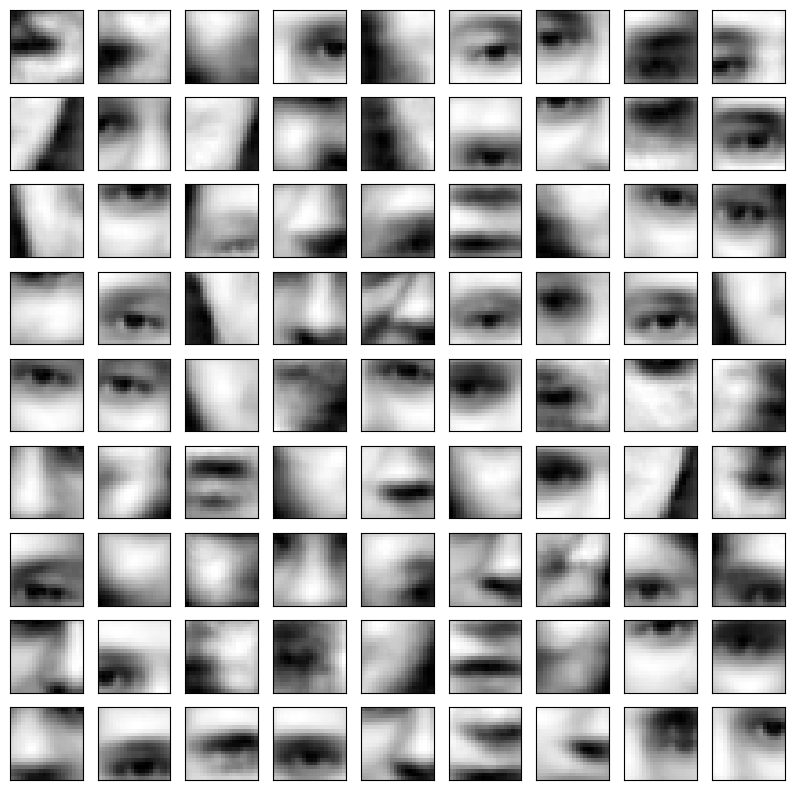

In [55]:
plt.figure(figsize=(10, 10))

for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

plt.show()

## 8) 계층적 군집화

In [72]:
# 계층적
# 비계층적 - KMeans 

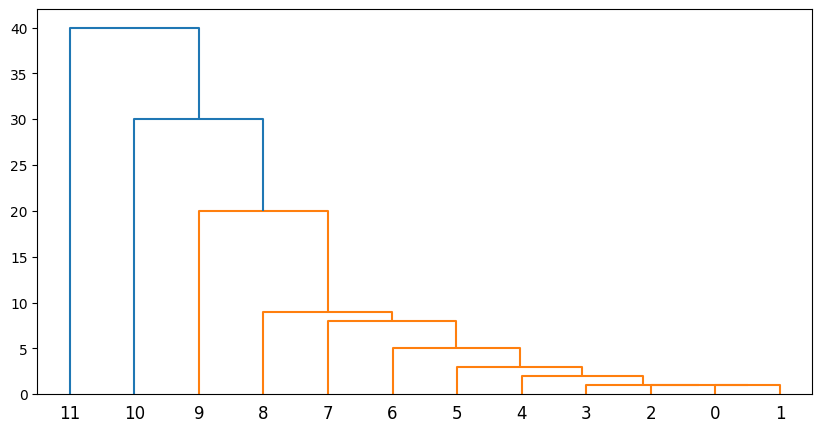

In [58]:
# 여러개의 군집중에서 유사도가 가장 높은 군집 2개를 선택하여 하나로 합치면서 군집수를 줄여가는 방법
# 처음에는 모든 군집이 하나의 데이터만을 가지고 군집을 합쳐가면서 최종적으로 하나의 군집만 남게 된다
# 모든 두 군집간의 거리를 계산
# 거리가 가장 가까운 것 2개를 묶음
# 하나의 군집으로 합쳐질 때까지 반복

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np

X = np.array([[i] for i in [0,1,2,3,5,8,13,21,30,50,80,120]])

# 두 군집의 가장 가까운 샘플의 거리를 기준으로 계산
Z = linkage(X, 'single')
plt.figure(figsize=(10, 5))
dendrogram(Z) #dendro 나무(라틴어)
plt.show()

# leaf: 샘플의 인덱스
# leaf의 순서와 가로방향으로 얼마나 가까운지는 의미가 없고
# branch가 합쳐지는 순간의 세로축의 거리가 두 그룹의 유사도를 알려주는 척도

# y축 거리
# X축 인덱스

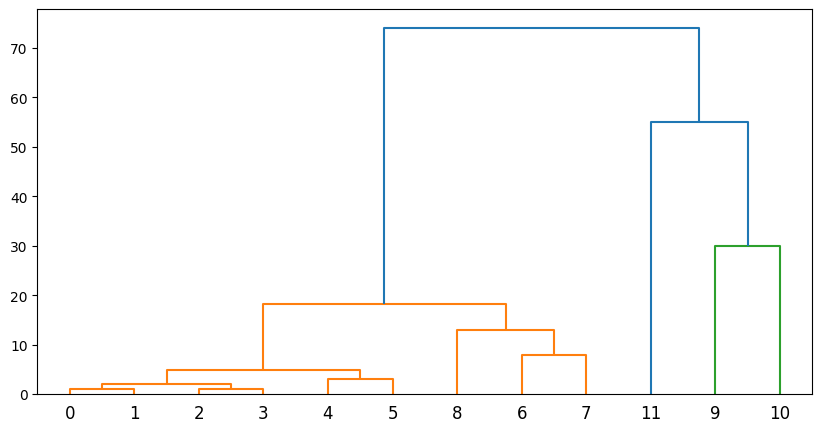

In [59]:
#두 군집의 모든 데이터의 평균거리를 기준으로 구분
Z = linkage(X, 'average')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

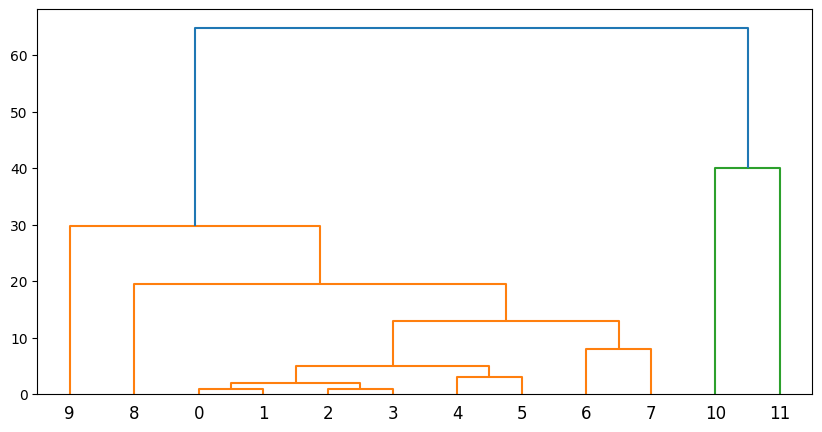

In [61]:
#가중 거리 방식
# 군집a와 군집b를 합쳐서 군집 c를 만들었다면
# 군집c와 군집d의 거리는  a와 d의 거리, b와 d의 거리의 평균을 사용하는 방식

Z = linkage(X, 'weighted')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

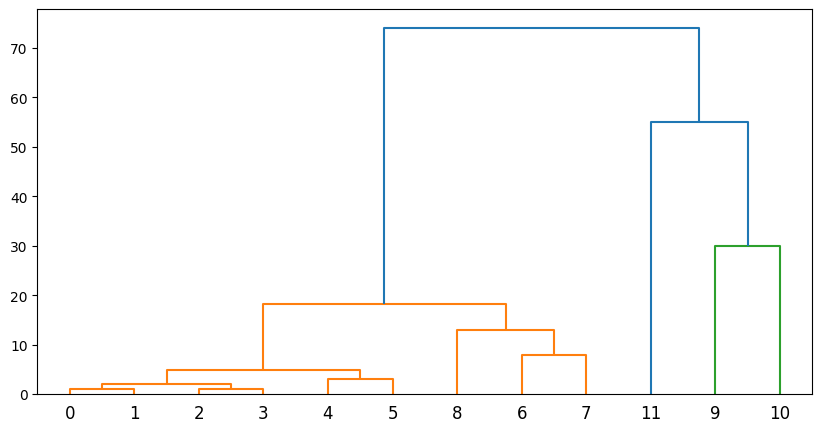

In [62]:
# 두 군집의 중심점의 거리를 기준으로 계산
Z = linkage(X, 'centroid')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

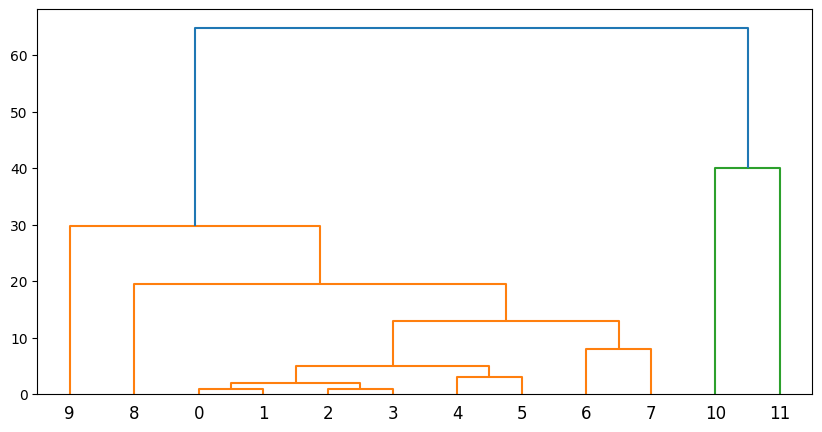

In [63]:
#두 군집을 결합하여 새로운 군집을 만든 경우 두 군집의 중심점의 중앙값을 중심으로 계산
#군집의 모든 데이터와의 평균거리를 계산하는 방식보다 속도가 빠른 장점이 있음

Z = linkage(X, 'median')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

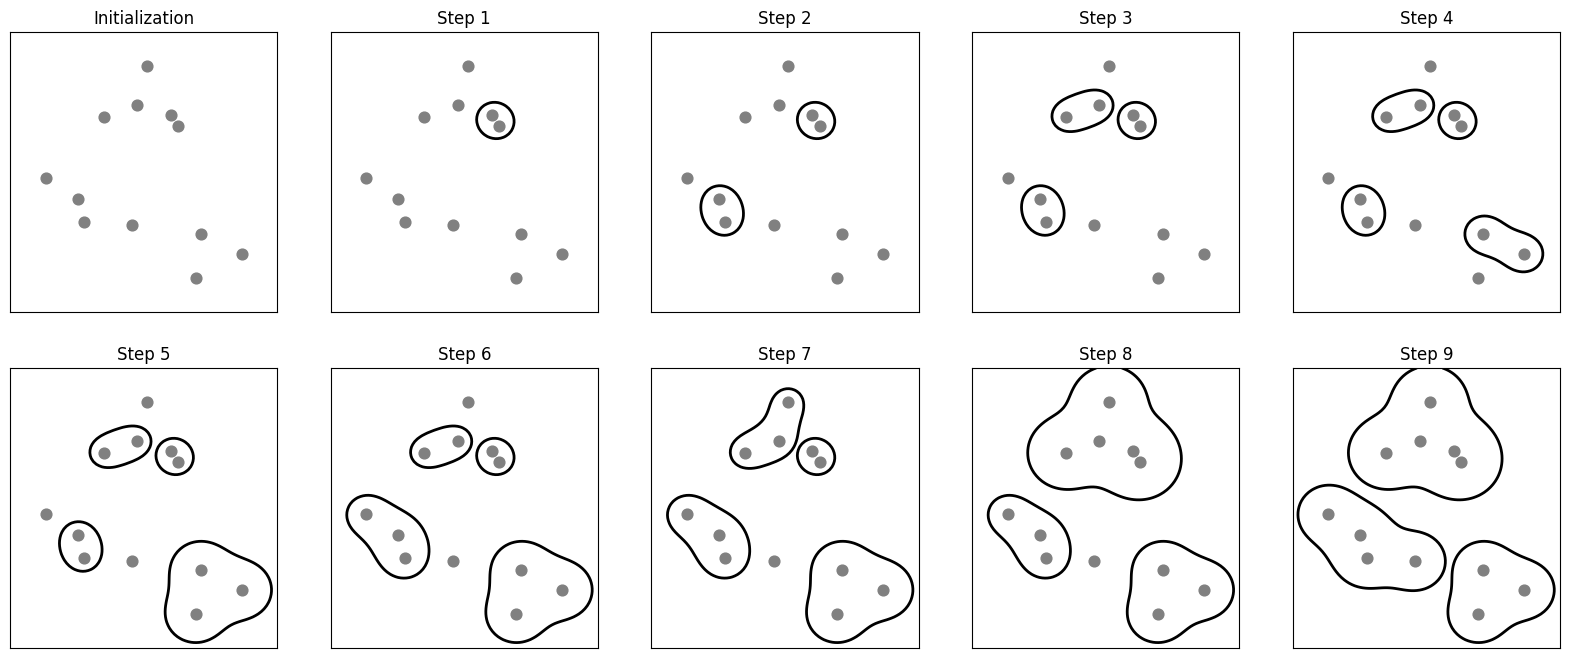

In [64]:
#시작할 때 각 포인트를 하나의 클러스터로 지정하고 가장 비슷한 두 클러스터를 합치는 방식
import mglearn
mglearn.plots.plot_agglomerative_algorithm()

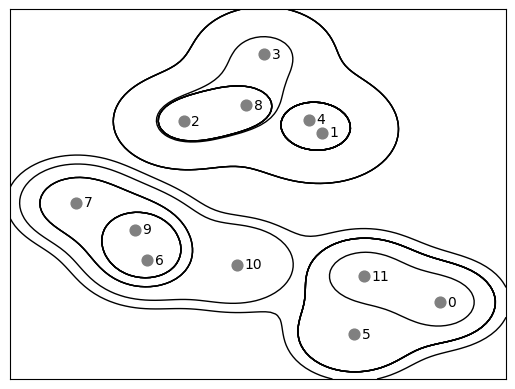

In [65]:
mglearn.plots.plot_agglomerative()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12704\2192546937.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_0[:, 0], x_0[:, 1], cmap=mglearn.cm3)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12704\2192546937.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_1[:, 0], x_1[:, 1], cmap=mglearn.cm3)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12704\2192546937.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_2[:, 0], x_2[:, 1], cmap=mglearn.cm3)


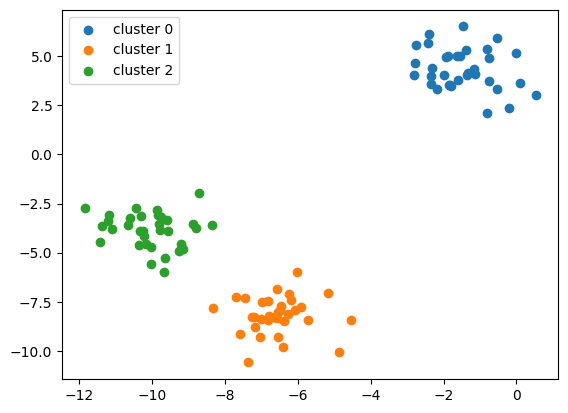

In [66]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import numpy as np

X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assign = agg.fit_predict(X)

# 배열 x 오른쪽에 열 한개 추가
a = assign.reshape(-1, 1)
x1 = np.hstack([X, a])

# 각 클래스별로 데이터 추출
x_0 = x1[x1[:, 2]==0, :]
x_1 = x1[x1[:, 2]==1, :]
x_2 = x1[x1[:, 2]==2, :]

# 시각화
plt.scatter(x_0[:, 0], x_0[:, 1], cmap=mglearn.cm3)
plt.scatter(x_1[:, 0], x_1[:, 1], cmap=mglearn.cm3)
plt.scatter(x_2[:, 0], x_2[:, 1], cmap=mglearn.cm3)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc=2)
plt.show()

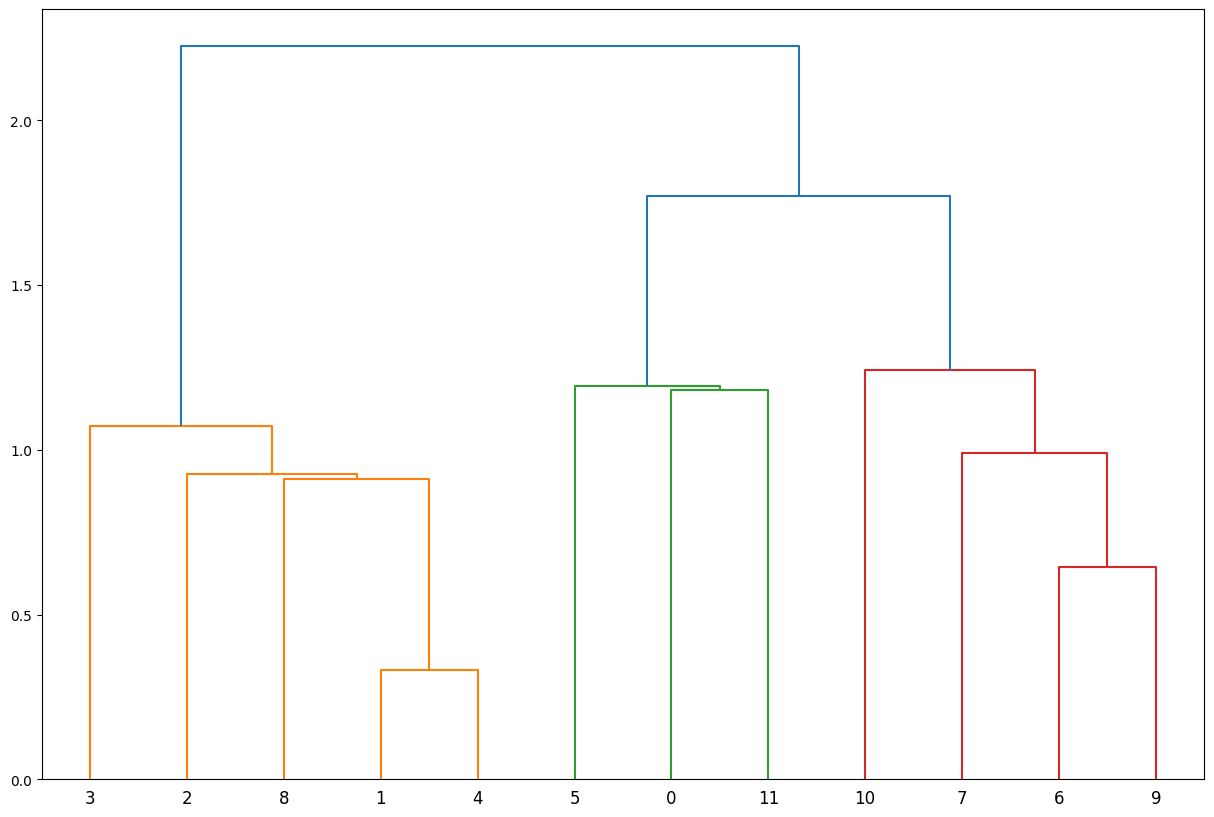

In [67]:
#위에서 만든 모형에 대한 이해를 하기 위하여 덴드로그램을 화면에 출력
from scipy.cluster.hierarchy import dendrogram, linkage

X, y = make_blobs(random_state=0, n_samples=12)
Z = linkage(X, 'single')
plt.figure(figsize=(15,10))
dendrogram(Z)
plt.show()

## 9) DBSCAN 군집화

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


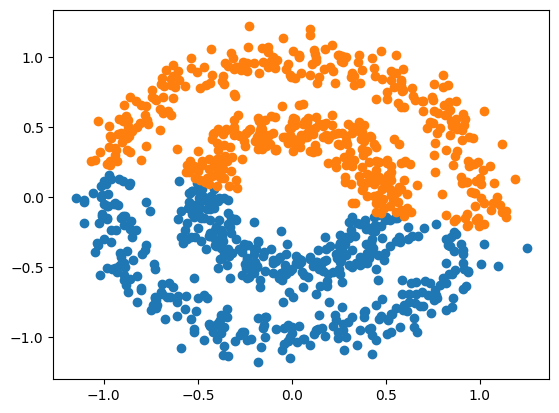

In [1]:
# kmeans의 단점 : 군집의 모양에 따라 잘 작동하지 않을 수 있음, 군집 개수를 직접 지정해야 함

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np

np.random.seed(2)

#factor : 내부 원과 외부 원 사이의 비율
X1, y1 = make_circles(n_samples=1000, factor=.5, noise=.09)

model = KMeans(n_clusters=2,random_state=10)
model.fit(X1)

plt.scatter(X1[model.labels_ == 0, 0], X1[model.labels_ == 0, 1])
plt.scatter(X1[model.labels_ == 1, 0], X1[model.labels_ == 1, 1])  

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


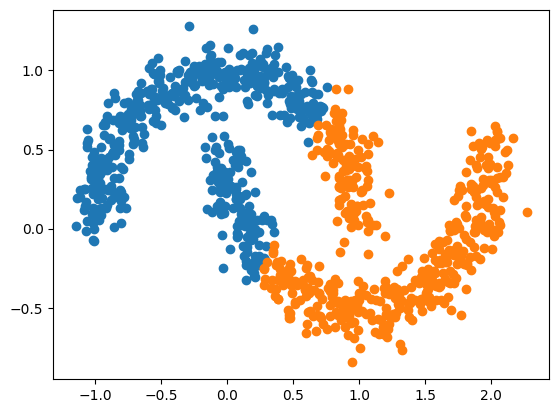

In [2]:
from sklearn.datasets import make_moons

X2, y2 = make_moons(n_samples=1000, noise=.1)
model = KMeans(n_clusters=2,random_state=10)
model.fit(X2)

plt.scatter(X2[model.labels_ == 0, 0], X2[model.labels_ == 0, 1])
plt.scatter(X2[model.labels_ == 1, 0], X2[model.labels_ == 1, 1]) 

In [3]:
# DBSCAN(Density-Based Spatial Clustering of Applications with Noise) 군집화  
# 데이터의 밀도에 기반한 군집화

# 포인트가 많이 몰려 있어서 밀도가 높은 부분을 클러스터링 하는 방식
# 어떤 포인트를 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식

# 군집의 갯수를 사용자가 지정할 필요가 없음
# 최소거리(이웃을 정의하기 위한 거리), 최소 데이터 갯수(밀집지역을 정의하기 위해 필요한 이웃의 갯수)

DBSCAN(eps=3, min_samples=2)
[ 0  0  0  1  1  2  2 -1]


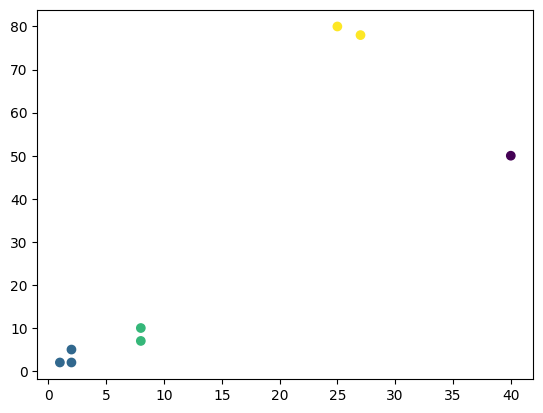

In [4]:
from sklearn.cluster import DBSCAN
import numpy as np

X = np.array([[1, 2], [2, 2], [2, 5],
              [8, 7], [8, 10], [25, 80], [27,78], [40,50]])

#최소거리 3, 최소샘플갯수 2개
# eps(epsilon) : 이웃을 정의하기 위한 거리, 기본값 0.5 / 범위가 넓어지거나 줄어들거나
# min_samples : 핵심데이터를 정의하기 위해 필요한 이웃영역 안의 데이터 갯수, 기본값 5

model = DBSCAN(eps=3, min_samples=2).fit(X)
print(model)

plt.scatter(X[:,0],X[:,1],c=model.labels_)
print(model.labels_) #3개로 나눠짐(-1은 노이즈가 있는 데이터, 아웃라이어)

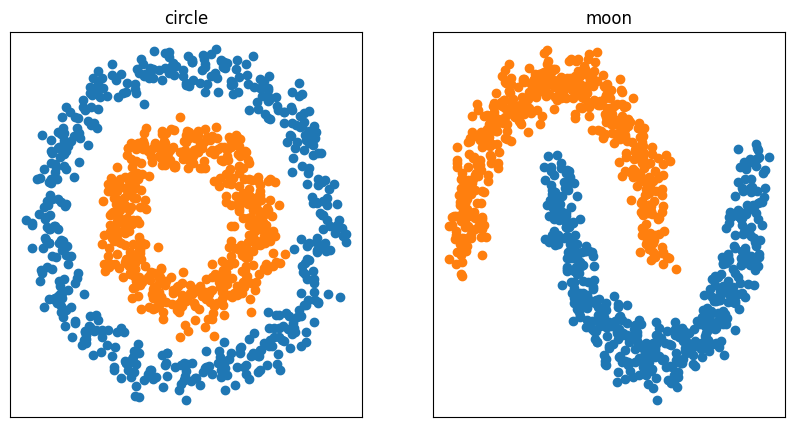

In [5]:
def plot_DBSCAN(title, X, eps):
    model = DBSCAN(eps=eps, min_samples=5)
    model.fit_predict(X)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1])
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1])
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_DBSCAN("circle", X1, 0.1)
plt.subplot(122)
plot_DBSCAN("moon", X2, 0.1)

In [6]:
import pandas as pd

df=pd.read_csv('./data/iris/iris.csv')
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [7]:
cols=df.columns[:-2]
X=df[cols]
y=df['Species']

In [8]:
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()

model = DBSCAN(eps=0.5,min_samples=5)
# model = DBSCAN(eps=1,min_samples=3) # 거리를 늘리고 최소샘플수를 줄인다
pipeline = make_pipeline(scaler,model) # 작업순서

pred = pd.DataFrame(pipeline.fit_predict(X))
pred.columns=['predict']

result = pd.concat([X,y,pred],axis=1)
result

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,-1


In [9]:
# 노이즈가 있는 샘플들은 -1로 처리됨
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

Text(0.5, 1.0, 'clustering')

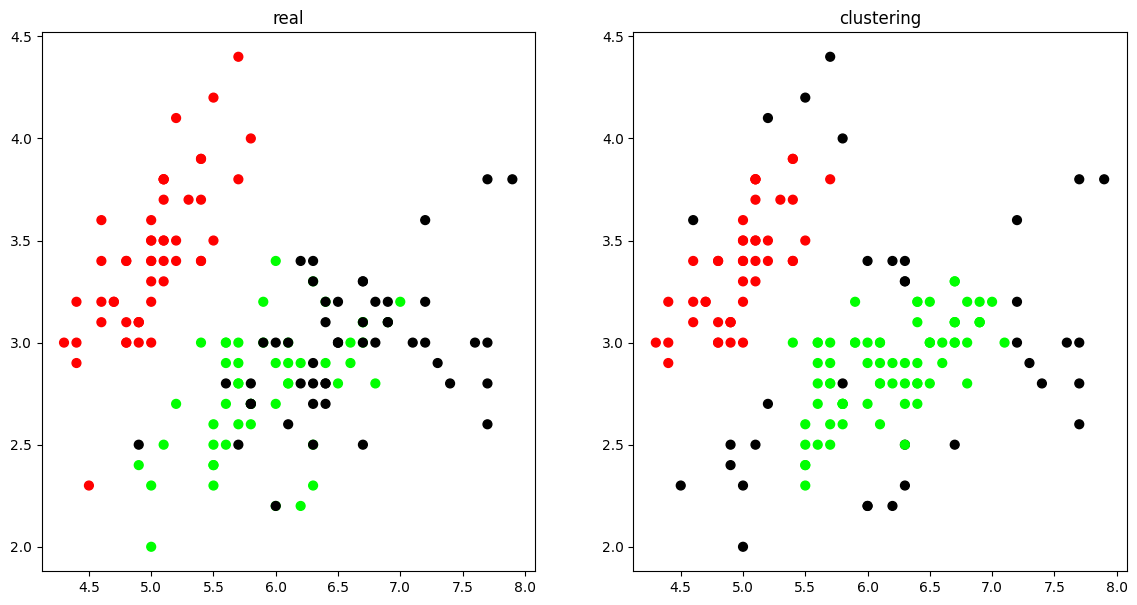

In [10]:
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))

# 색상 배열
colormap = np.array(['red', 'lime', 'black'])

# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(result['SepalLength'], result['SepalWidth'], c=colormap[y], s=40)
plt.title('real')

# 그래프 출력(클러스터링)
plt.subplot(1, 2, 2)
plt.scatter(result['SepalLength'], result['SepalWidth'], c=colormap[model.labels_], s=40)
plt.title('clustering')

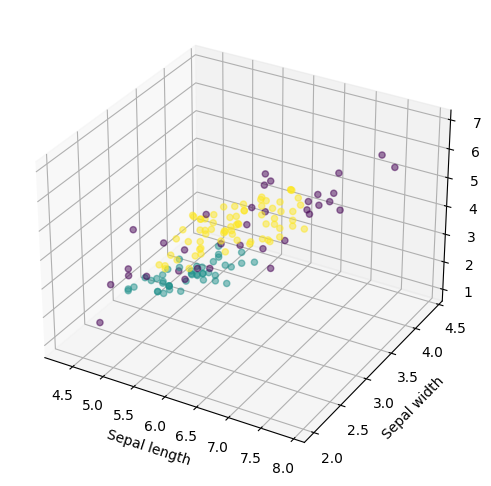

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(6,6))

# rect : 축의 위치 left, bottom, width, height
# elev 고도보기 각도(기본값 30), azim 방위각(기본값 -60)

ax=fig.add_subplot(111,projection='3d')
ax.scatter(result['SepalLength'],result['SepalWidth'],result['PetalLength'],c=result['predict'],alpha=0.5)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()